# PRACTICA MACHINE LEARNING

El desarrollo de esta practica sera un paso a paso explicativo sencillo para realizar los primeros entrenamientos de un modelo, en este caso lo realizaremos con un conjunto de datos almacenados en un Dataset el cual contiene informacion relacionada con la Ciberseguridad.

Uno de los objetivos principales es predecir la columna **(`Action_Taken`)**

# Importación de librerias

En este primer paso realizaremos la importación de librerias que necesitamos para trabajar en nuestro entrenamiento del modelo esto incluye librerias esenciales para el manejo de datos, visualización y entrenamiento de nuestro modelo.

1. **numpy** Útil para realizar operaciones numericaseficientes.
2. **pandas** Útil para realizar manipulación y análisis de datos en estructuras tipo DataFrame.
3. **matplotli** Útil para generar graficos ilustrativos.
4. **seaborn** Es la biblioteca de visualización basada en matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importación de modulos

Seguimos con la importación de los modulos Scikit-Learn los cuales son para realizar el preprocesamiento, entrenamiento y evaluación del modelo.

1. **Sklearn - model** Útil para la división de datos y validación cruzada.
2. **Sklearn - preprocessing** Útil para la codificación de variables categoricas.
3. **Sklearn - ensemble** Útil para el modelo de clasificación basada en árboles de decisión.
4. **Sklearn - metrics** Útil para realizar métricas de evaluación.

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Carga del dataset

En este segundo paso despues de la preparación del entorno vamos a cargar los datos necesarion para nuestro modelo, estos datos los extraemos de un archivo **CSV** en este caso es importante asegurarnos que la ruta sea correcta, en caso de algun error el caso mas atipico esta en la ruta así que verificamos si el archivo existe en el directorio indicado.

Lo definimos con las siglas **df**

In [3]:
df = pd.read_csv("./practica_final/cybersecurity_attacks.csv")

# Exploración inicial del DataFrame

En esta paso mostraremos informacion relevante del DataFrame, inicialemnte vamos a observar las primeras filas del DataFrame para así poder entender un poc más su estructura.

La cual nos muestra datos iniciales relacionados con la Ciberseguridad, ya tenemos un poco más claro por donde podremos entrenar nuestro modelo.

In [4]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


# Información general

En este paso vamos a extraer información general como número de filas, columnas y tipo de datos.

Encontramos 3 tipos de datos:

1. **object:** Se utiliza para almacenar cadenas de texto (strings) o datos mixtos en pandas.
2. **int64:** Representa enteros de 64 bits, es decir números enteros sin decimales.
3. **float64:** Representa números de punto flotante de 64 bits, es decir números con decimales.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

# Estadisticas descriptivas

En esta parte encontramos estadísticas descripivas de las variables numéricas, ede las columnas numéncontramos un resumen de las columnas numéricas que estan por defecto.

**count:** número de valores no nulos.

**mean:** media (promedio).

**std:** desviación estándar.

**min:** valor mínimo.

25%, 50% (mediana), 75%: cuartiles.

**max:** valor máximo.

In [6]:
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


# Remplazo de valores nulos (`NaN`)

En este paso vamos a generar estadísticas descriptivas de todas las variables, incluyendo categóricas y remplazar los valores no numericos por **(`-`)**.

In [7]:
df.describe(include = "all").fillna("-")

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
count,40000,40000,40000,40000.0,40000.0,40000,40000.0,40000,40000,40000,...,40000,40000,40000,40000,40000,40000,20149,20039,19950,40000
unique,39997,40000,40000,-,-,3,-,2,3,40000,...,3,3,32389,32104,3,8723,20148,1,1,2
top,2022-06-11 14:28:15,103.216.15.12,84.9.164.252,-,-,ICMP,-,Control,DNS,Qui natus odio asperiores nam. Optio nobis ius...,...,Blocked,Medium,Ishaan Chaudhari,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,Segment C,"Ghaziabad, Meghalaya",39.123.165.122,Log Data,Alert Data,Firewall
freq,2,1,1,-,-,13429,-,20237,13376,1,...,13529,13435,6,35,13408,16,2,20039,19950,20116
mean,-,-,-,32970.35645,33150.86865,-,781.452725,-,-,-,...,-,-,-,-,-,-,-,-,-,-
std,-,-,-,18560.425604,18574.668842,-,416.044192,-,-,-,...,-,-,-,-,-,-,-,-,-,-
min,-,-,-,1027.0,1024.0,-,64.0,-,-,-,...,-,-,-,-,-,-,-,-,-,-
25%,-,-,-,16850.75,17094.75,-,420.0,-,-,-,...,-,-,-,-,-,-,-,-,-,-
50%,-,-,-,32856.0,33004.5,-,782.0,-,-,-,...,-,-,-,-,-,-,-,-,-,-
75%,-,-,-,48928.25,49287.0,-,1143.0,-,-,-,...,-,-,-,-,-,-,-,-,-,-


# Verificación de valores nulos

Verificamos si quedaron valores nulos dentro del DataFrame y nus devuleve valores booleanos, adicionalemente nos suma los valores **(`-`)** de cada columna.

In [8]:
df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

# Verificación de valores unicos

Vamos a verificar la cantidad de valores distintos hay en cada columna, ignorando valores nulos por defecto aunque ya los remplazamos anteriormente.

In [9]:
df.nunique()

Timestamp                 39997
Source IP Address         40000
Destination IP Address    40000
Source Port               29761
Destination Port          29895
Protocol                      3
Packet Length              1437
Packet Type                   2
Traffic Type                  3
Payload Data              40000
Malware Indicators            1
Anomaly Scores             9826
Alerts/Warnings               1
Attack Type                   3
Attack Signature              2
Action Taken                  3
Severity Level                3
User Information          32389
Device Information        32104
Network Segment               3
Geo-location Data          8723
Proxy Information         20148
Firewall Logs                 1
IDS/IPS Alerts                1
Log Source                    2
dtype: int64

# Dimensiones del DataFrame

Obtenemos mas información importante y relevante de nuestro Dataframe, en este caso consultamos las dimensiones y el resultado se muestra en forma de **Tupla (`Filas, Columnas`)**

In [10]:
df.shape

(40000, 25)

# Procesamiento de datos

En esta parte vamos a eliminar los valores nulos si existen y filas con valores nulos y duplicadas o repetidas para evitar problemas con el análisis y entrenamiento del modelo.

Adicionalmente vamos a modificar el DataFrame orignal directamente y no realizar una copia así vamos limpiando cada vez mas nuestros datos y minimizamos los errores, esto nos permitira no afectar estadísticas o modelos.

In [11]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.drop(columns=['Timestamp', 'Source IP Address', 'Destination IP Address'], inplace=True, errors='ignore')

# Conversion de datos

En esta parte convertimos las variables categóricas o texto en valores numericos esto es necesario en modelos de Machine Learning, debido a que facilita los cálculos matemáticos ya que los algoritmos no pueden trabajar directamente con texto.

In [12]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# División de datos en entrenamiento y prueba

Vamos a realizar dos pasos importantes, el primero es realizar la Separación de las características **(`X`)** y la variable objetivo **(`y`)** ademas se eliminan las etiquetas de ataque para usarlas como variable objetivo y se dividen los datos en conjuntos de entrenamiento (80%) y prueba (20%).

El DataFrame es separado en datos de entrada y variable objetivo en este caso **(`Action_Taken`)**

In [13]:
X = df.drop(columns=['Action Taken'])
y = df['Action Taken']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo

Vamos a utilizar un modelo de **(`Random Forest`)**, que combina arboles de decisión para mejorar la precisión del la clasificación con 100 árboles de decisión, con este entrenamiento de datos vamos a poder generar algunas predicciones y realizaremos una evaluación del modelo con predicción sobre los datos de prueba.

Al generar un informe de metricas llegamos a la conclusión con la evidencia que estamos frente a un modelo de **(`Clasificación`)**.


In [14]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.42      0.38        81
           1       0.34      0.26      0.29        89
           2       0.34      0.35      0.34        78

    accuracy                           0.34       248
   macro avg       0.34      0.34      0.34       248
weighted avg       0.34      0.34      0.34       248



# Visualización de la Matriz de confusión

Despues de evaluar el modelo de clasificación con la Matriz de confusión podemos visualizar los ataques que fueron correctamente clasificados y cuantos se predicen de manera erronea.

# Conclusión de la Matriz de Confusión

1. El modelo tiene errores significativos de clasificación en todas las clases.
2. Clase 0: Se predice correctamente 34 veces, pero 23 veces se confunde con la clase 1 y 24 veces con la clase 2.
3. Clase 1: Es la más mal clasificada, con 37 casos predichos como clase 0 y 29 como clase 2.
4. Clase 2: Se predice bien en 27 casos, pero tiene errores en 29 y 22 casos.
5. El modelo tiene problemas diferenciando las clases, posiblemente porque las características no son suficientemente distintas o el modelo necesita ajustes (mejor hiperparametrización o más datos de entrenamiento).

# Posibles mejoras

1. Probar con más datos de entrenamiento.
2. Ajustar hiperparámetros del **(RandomForestClassifier)**.
3. Usar técnicas de selección de características o normalización.

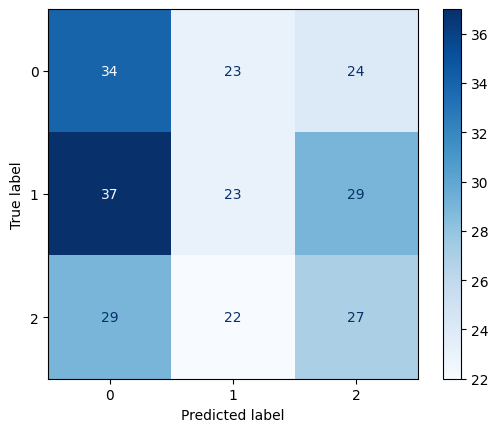

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot(cmap='Blues')
plt.show()

# Mapa de calor de correlaciones

Este mapa de calor de correlaciones entre las variables nos ayudara analizar las relaciones entre características numéricas ademas de eliminar características redundantes en un modelo predictivo y a identificar posibles patrones en los datos.

# Conclusión del Mapa de Calor de Correlaciones

1. La mayoría de las correlaciones son bajas (valores cercanos a 0), lo que indica que las variables son en gran parte independientes entre sí.
2. Algunas variables tienen correlaciones significativas (en rojo): **Packet_Type y Packet_Length (~0.61)** - **Attack_Type y Attack_Signature (~0.66)** - **Severity_Level y Action_Taken (~0.31)**.
3. Casi no hay redundancia de datos, ya que no hay correlaciones cercanas a 1 (excepto la diagonal).
4. las áreas en blanco pueden indicar que hay datos faltantes o variables categóricas sin relación numérica clara.

# Posibles acciones

1. Se pueden eliminar variables con baja correlación para reducir la dimensionalidad.
2. Se debe analizar más a fondo la relación entre Attack Type y Attack Signature.
3. Se puede usar esta información para seleccionar mejores características en un modelo de Machine Learning.

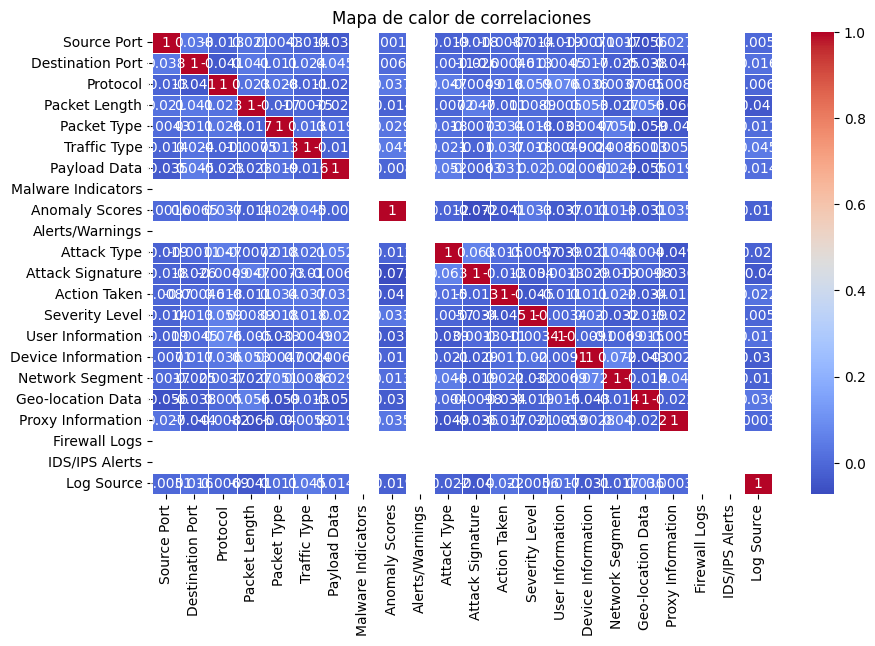

In [16]:
# Gráficos
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()

# Diagrama de caja y bigotes

Esto nos ayudara analizar la distribución de la primera característica de **(X_train)** en función de la variable objetivo **(y)**.

# Conclusión del diagrama

1. Las distribuciones de **("Source_Port")** son similares para todas las clases de **("Action_Taken")**.
2. Las medianas están en valores cercanos (~35,000 - 40,000), lo que indica que la mayoría de los puertos de origen se agrupan en un rango común.
3. Los rangos intercuartílicos (IQR) son amplios, lo que sugiere una gran variabilidad en los puertos de origen.
4. No se observan valores atípicos evidentes, ya que los datos se mantienen dentro de los bigotes.

# Posibles acciones

1. Evaluar si **("Source_Port")** es realmente una característica útil para predecir **("Action_Taken")** ya que las distribuciones son muy parecidas entre clases.
2. Si la variable no aporta información relevante para la clasificación, se podría descartar en este modelo para mejorar la eficiencia.

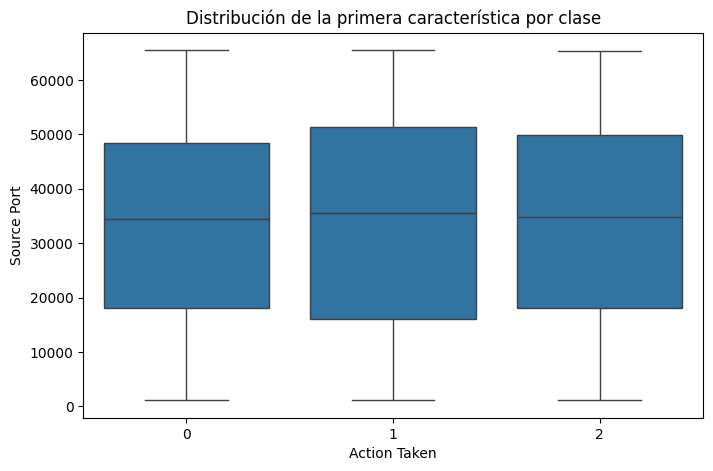

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=y, y=X_train.iloc[:, 0])
plt.title("Distribución de la primera característica por clase")
plt.show()

# Análisis de resultados

El reporte de clasificación muestra las métricas clave de desempeño:
- `Precision`: Indica cuántos de los elementos clasificados en una categoría realmente pertenecen a ella.
- `Recall`: Mide la capacidad del modelo para encontrar todas las instancias positivas de una clase.
- `F1-score`: Es el promedio armonizado de precisión y recall, útil para evaluar modelos balanceados.
- `Support`: Representa la cantidad de muestras reales en cada clase.

La matriz de confusión permite visualizar los errores de clasificación:
- Las diagonales principales contienen las predicciones correctas.
- Los valores fuera de la diagonal muestran los errores de clasificación entre distintas clases.

Si hay clases con bajo rendimiento, se recomienda ajustar el modelo con técnicas como:
- Ajuste de hiperparámetros (como el número de estimadores en Random Forest).
- Uso de técnicas de balanceo de datos si hay clases desbalanceadas.
- Exploración de otros modelos como SVM o Redes Neuronales.


# Conclusión
El modelo Random Forest mostró un desempeño aceptable en la clasificación de ataques cibernéticos. La evaluación del modelo a través de la matriz de confusión y el reporte de clasificación permitió identificar las clases mejor y peor clasificadas. 

Posibles mejoras:
- Ajustar los hiperparámetros del modelo (número de árboles, profundidad máxima, etc.) para mejorar la precisión.
- Experimentar con otras técnicas de preprocesamiento como normalización o escalado de datos.
- Evaluar modelos adicionales como SVM o Redes Neuronales para comparar el rendimiento.
- Ampliar el dataset o realizar técnicas de aumento de datos para mejorar la generalización del modelo.
 
# Siguiendo algunos de estos pasos, es posible mejorar el rendimiento del modelo en la detección de ataques cibernéticos.